In [65]:
import datetime
"""
This module contains functions for calculating financial metrics.

Functions:
- calculate_returns: Calculate the returns of a given stock.
- calculate_volatility: Calculate the volatility of a given stock.
- plot_stock_prices: Plot the stock prices of a given stock.
"""
from datetime import date
from datetime import timedelta, timezone
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yfin
from matplotlib import pyplot as plt

In [66]:
# Set the display format for floating point numbers in pandas
pd.options.display.float_format = "{:,.6f}".format

start = datetime.date.today()-datetime.timedelta(365*10)
end = datetime.date.today()

# start = datetime.date(2011, 11, 25)
# end = datetime.date(2021, 11, 23)

prices = yfin.download(["^GSPC", "^RUT"], start, end)["Adj Close"]
prices = prices.rename(columns={"^GSPC": "SP500", "^RUT": "Russell2000"})
# Calcalue the log returns of the S&P 500 and Russell 2000

log_returns = np.log(prices / prices.shift(1))
print(log_returns.head())

[*********************100%***********************]  2 of 2 completed

Ticker                        SP500  Russell2000
Date                                            
2014-09-12 00:00:00+00:00       NaN          NaN
2014-09-15 00:00:00+00:00 -0.000710    -0.012214
2014-09-16 00:00:00+00:00  0.007457     0.003874
2014-09-17 00:00:00+00:00  0.001295     0.002534
2014-09-18 00:00:00+00:00  0.004879     0.004652


In [67]:
# Calcualte Future Value of each index using continuous compounding 
i = log_returns.mean()
print(i)
futrue_value = np.exp(i * 252 * 10) * 1000
print(futrue_value)

# Calcualte Future Value of each index using standard/discrete compounding 
futrue_value_disc = (1 + i) ** (252 * 10) * 1000
print(futrue_value_disc)

Ticker
SP500         0.000399
Russell2000   0.000234
dtype: float64
Ticker
SP500         2,732.610392
Russell2000   1,805.374728
dtype: float64
Ticker
SP500         2,732.062692
Russell2000   1,805.249734
dtype: float64


In [68]:
prices.index = prices.index.tz_localize(None)  # Remove timezone awareness from the DatetimeIndex
currYear = prices.loc[
    datetime.date.today() - datetime.timedelta(365) : datetime.date.today()  # noqa E203 to ignore PEP8 warning about space before slice
]

# Calculate the maximum and minimum prices over the last 365 days
# currYear.max() gives the highest price within this period
# currYear.min() gives the lowest price within this period
# The difference between these two values represents the price fluctuation (range)
price_range = currYear.max() - currYear.min()

# Output the price range (maximum - minimum) for the selected period
print(price_range)


Ticker
SP500         1,549.830078
Russell2000     626.729980
dtype: float64


In [69]:
(currYear.max() - currYear.min()) / prices.iloc[-1]

Ticker
SP500         0.286559
Russell2000   0.299669
dtype: float64

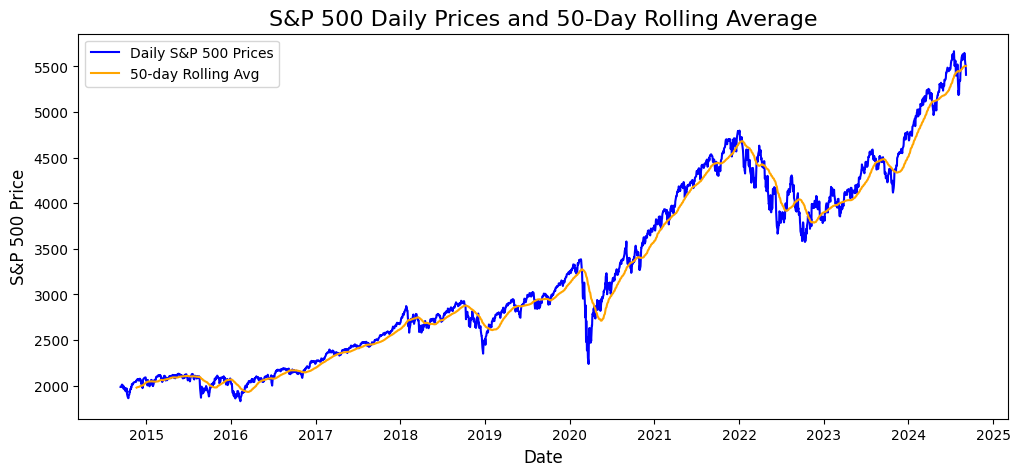

In [70]:
# Compute the 50-day rolling average
prices["SP500 50 day_rolling_avg"] = prices["SP500"].rolling(50).mean()

# Set figure size
plt.figure(figsize=(12, 5))

# Plot the daily S&P 500 prices
plt.plot(prices.index, prices["SP500"], label="Daily S&P 500 Prices", color='blue')

# Plot the 50-day rolling average
plt.plot(prices.index, prices["SP500 50 day_rolling_avg"], label="50-day Rolling Avg", color='orange')

# Add title and labels
plt.title("S&P 500 Daily Prices and 50-Day Rolling Average", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("S&P 500 Price", fontsize=12)

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [74]:
# Calculate the 50-day rolling average of the S&P 500 prices
rolling_50 = prices.rolling(50).mean()
# Calculate the absolute difference between the S&P 500 prices and the 50-day rolling average
abs_diff = abs(prices - rolling_50)
# Calculate the volatility as the mean of the absolute difference divided by the prices
volatility = (abs_diff/prices).mean()
print(volatility)

Ticker
SP500                      0.029784
Russell2000                0.038861
SP500 50 day_rolling_avg   0.022172
dtype: float64
